In [0]:
# call-in all the dependencies
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [0]:
# lets get our data for training
(x_train, _), (x_test, _) = mnist.load_data()

# normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

# reshaping
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# squenching in noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

# againing normalizing by clipping method as we dont know the random values used here
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

In [0]:
# lets make our model

input_img = Input(shape = (28, 28, 1))

# model parts the encoder and decoder
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(input_img)
x = MaxPooling2D((2,2), padding = 'same')(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
encoder = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoder)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2,2))(x)
decoder  = Conv2D(1, (3,3), activation = 'sigmoid', padding = 'same')(x)

# autoencoder defining
autoencoder = Model(input_img, decoder)
autoencoder.compile(loss = 'binary_crossentropy', optimizer = 'adadelta')

In [0]:
# training the model
autoencoder.fit(x_train_noisy, x_train,
                epochs = 10, # go for 100 epochs
                shuffle = True,
                batch_size = 128,
                validation_data = (x_test_noisy, x_test))
# we have x = x_train_noisy and y = x_train for the model to work

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.1071 - val_loss: 0.1053
Epoch 2/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.1050 - val_loss: 0.1026
Epoch 3/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.1036 - val_loss: 0.1012
Epoch 4/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.1028 - val_loss: 0.1015
Epoch 5/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.1021 - val_loss: 0.1004
Epoch 6/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.1014 - val_loss: 0.0992
Epoch 7/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.1008 - val_loss: 0.0992
Epoch 8/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.1003 - val_loss: 0.0984
Epoch 9/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0999 - val_loss: 0.0

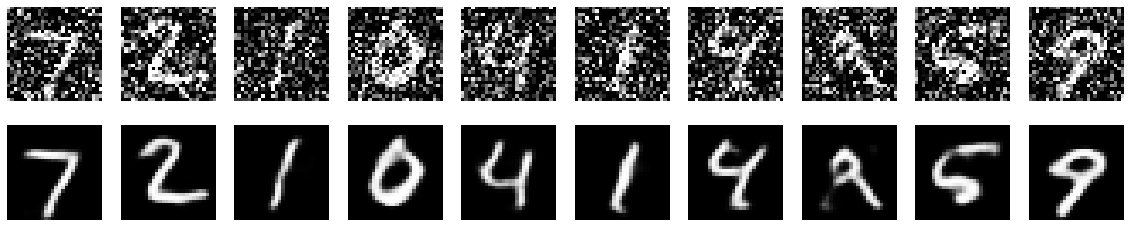

In [0]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
# so as we can see that the noise is decreased and vanished to a great extent
# hence these are called the Denoising Autoencoders
# Now its time for Variational autoencoders